In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
train = pd.read_csv("Datasets/Titanic/train.csv")
test = pd.read_csv("Datasets/Titanic/test.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
train_Id = train['PassengerId']
test_Id = test['PassengerId']
train = train.drop(['PassengerId'],axis=1)
test = test.drop(['PassengerId'], axis=1)
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


# 1. Exploratory Data Analysis
## 1.1. Dataset Inspection

In [5]:
n_train = train.shape[0]
n_test = train.shape[0]
df = pd.concat((train,test), sort=True).reset_index(drop=True)
df = df.drop(['Survived'],axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,373450


In [31]:
df['Pclass'] = df['Pclass'].astype('object')
num_features = df.select_dtypes(include=[np.number]).columns
cat_features = df.select_dtypes(include=[np.object]).columns
print("Numerical Features: \n",num_features)
print("Categorical Features: \n",cat_features)

Numerical Features: 
 Index(['Age', 'Fare', 'Parch', 'SibSp', 'Title'], dtype='object')
Categorical Features: 
 Index(['Cabin', 'Embarked', 'Pclass', 'Sex', 'Ticket'], dtype='object')


In [156]:
df.describe()

,Age,Fare,Parch,SibSp
count,1046.000000,1308.000000,1309.000000,1309.000000
mean,29.881138,33.295479,0.385027,0.498854
std,14.413493,51.758668,0.865560,1.041658
min,0.170000,0.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,0.000000
50%,28.000000,14.454200,0.000000,0.000000
75%,39.000000,31.275000,0.000000,1.000000
max,80.000000,512.329200,9.000000,8.000000


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
Age         1046 non-null float64
Cabin       295 non-null object
Embarked    1307 non-null object
Fare        1308 non-null float64
Name        1309 non-null object
Parch       1309 non-null int64
Pclass      1309 non-null object
Sex         1309 non-null object
SibSp       1309 non-null int64
Ticket      1309 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 102.4+ KB


## 1.2. Missing Value Inspection

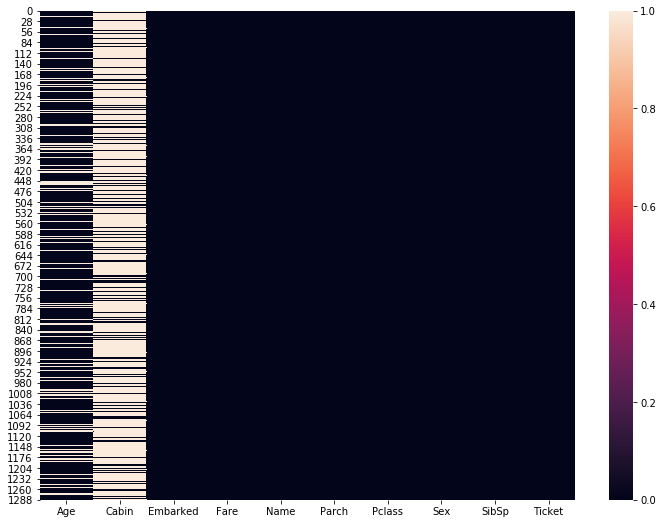

In [32]:
plt.figure(figsize=(12,9))
sns.heatmap(df.isnull())

Cabin and Age are the only two features with missing values. Let's check the percentages.

In [78]:
missing_percentage = (np.sum(df.isnull())/len(df))*100
print(missing_percentage.sort_values(ascending=False))

Cabin       77.463713
Age         20.091673
Embarked     0.152788
Fare         0.076394
Ticket       0.000000
SibSp        0.000000
Sex          0.000000
Pclass       0.000000
Parch        0.000000
Name         0.000000
dtype: float64


Cabin has 77.5% missing values and Age has 20% missing values. Embarked and Fare are also missing 0.1% of their data.
We will handle those missing values later.

## 1.3. Outlier Inspection

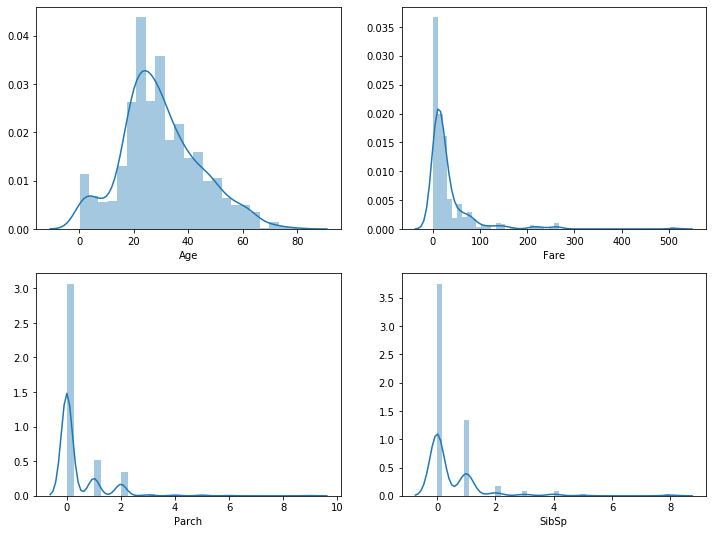

In [11]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))
for i, ax in enumerate(fig.axes):
    sns.distplot(df[num_features[i]].dropna(), ax=ax)

Here, we can see that Age appears to have normal distribution with just a little bit of right skewness. In fare, skewness begins after $150 or $200 range, which represents 1st class passengers. In Parch and SibSp, passengers with parents or siblings of over 4 contribute skewness. We can check the survived rate of those skewed data. We can also make a new feature ParFam from Parch and SibSp since those features share the same sense and same distribution. In this case, the outliers contribute the dataset's sense so, we will just let them be.

In [7]:
df['ParFam'] = df['Parch']+df['SibSp']
df= df.drop(['Parch','SibSp'], axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Ticket,ParFam
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",3,male,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,female,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",3,male,373450,0


## 1.4. Numerical Correlation

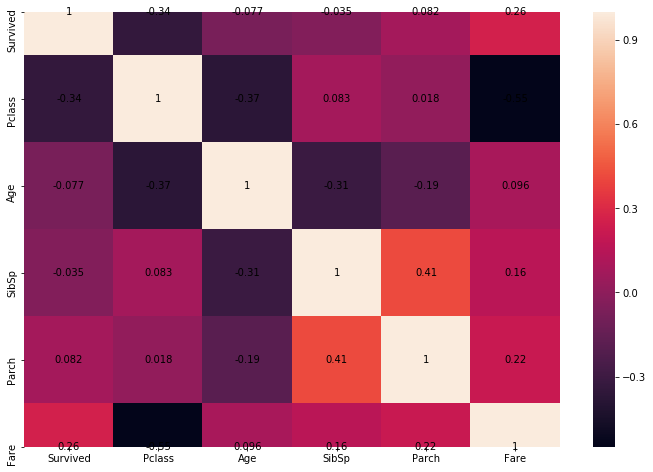

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(), annot=True, annot_kws={'c':'black'})

According to the above heatmap, Fare has the positive correlation to survival rate and the Pclass has the negative correlation to the survival rate. And one insight is that we did a great job at adding Parch and SibSp into PFam since we can see in the heatmap that these two have big positive correlation. 
Now, we should plot each numerical feature against Survived to see the correlation.

## 1.5. Numerical Distributions per class

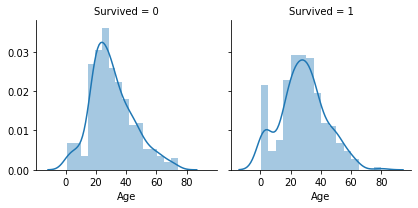

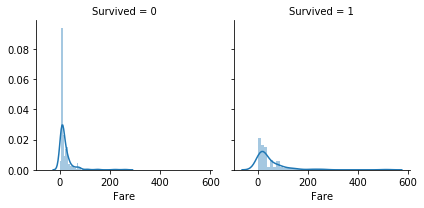

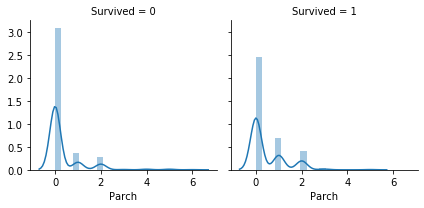

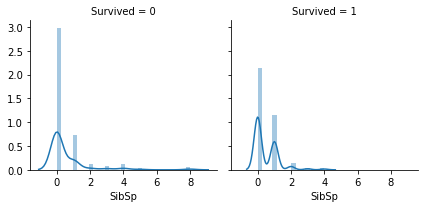

In [14]:
for i in num_features:
    g = sns.FacetGrid(train, col="Survived")
    g.map(sns.distplot, i)

From the age distribution, we can see that children with age of less than 10 survived more. By looking at this stat, we can see that children have been prioritized in saving process.

## 1.6. Categorical Distributions

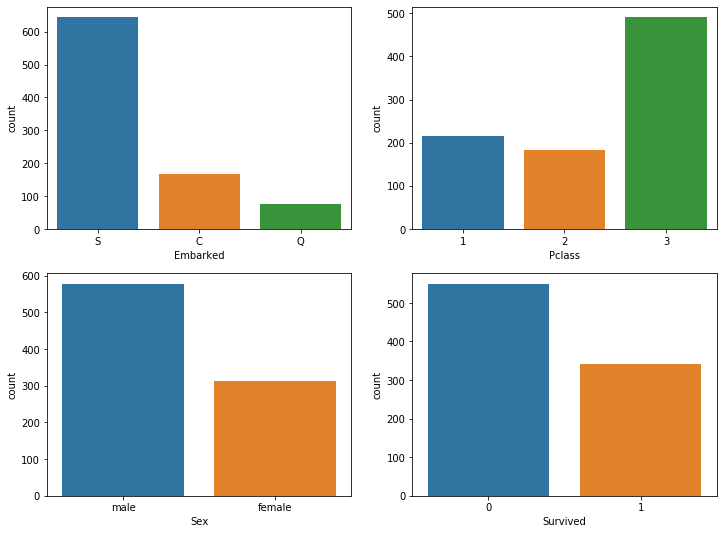

In [53]:
cat_cols = ['Embarked','Pclass','Sex','Survived']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,9))
for i, ax in enumerate(fig.axes):
    sns.countplot(train[cat_cols[i]], ax=ax)

## 1.7. Categorical Distributions per Class

C:\Users\acer\Anaconda3\envs\Data_Science\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


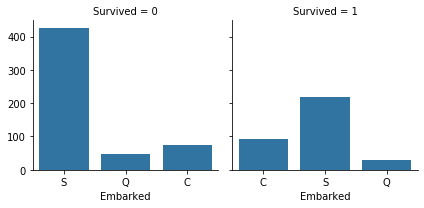

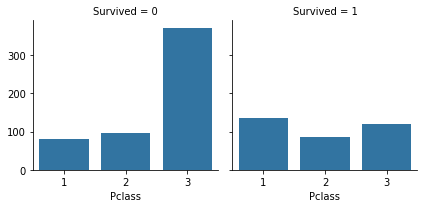

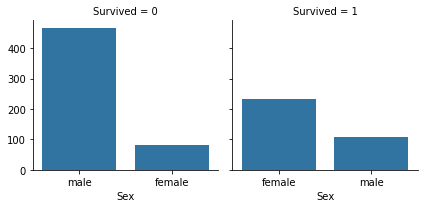

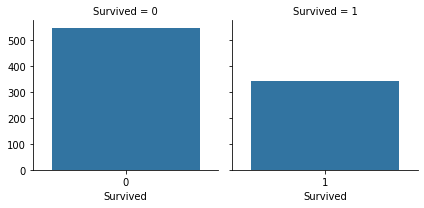

In [54]:
ordered_survived = train.Survived.value_counts().index
for i in cat_cols:
    g = sns.FacetGrid(train, col="Survived", col_order=ordered_survived, sharex=False)
    g.map(sns.countplot, i)

Interesting discovery here is that people from 1st class survived the most among the 3 classes. And female passengers survived the most. According to the analysis so far, the saving process seems to prioritize the female and children passengers which makes sense.

# 2. Feature Engineering
## 2.1 Missing Value Handling

In [9]:
df = df.drop(['Cabin'])
cat_features = df.select_dtypes(include=[np.object])
df.head()

KeyError: "['Cabin'] not found in axis"

In [162]:
import sys
import math
age_col = df["Age"]
bin = math.floor(len(age_col)/4)

for i in range(4):
    age_col[bin*i:bin*(i+1)] = age_col[bin*i:bin*(i+1)].fillna(age_col[bin*i:bin*(i+1)].mean())
age_col[bin*(i):] = age_col[bin*(i):].fillna(age_col[bin*(i):].mean())

print(np.sum(age_col.isnull()))
df["Age"] = age_col
print(np.sum(df["Age"].isnull()))

0
0


C:\Users\acer\Anaconda3\envs\Data_Science\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\acer\Anaconda3\envs\Data_Science\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Now, we have to handle Embarked and Fare. Since only about 0.1% of the data is missing, we will fill NA values of Embarked with mode of Embarked and Fare with the mean value.

In [163]:
df["Embarked"] = df["Embarked"].fillna('S')
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
missing_percentage = (np.sum(df.isnull())/len(df))*100
print(missing_percentage.sort_values(ascending=False))

ParFam      0.0
Ticket      0.0
Sex         0.0
Pclass      0.0
Name        0.0
Fare        0.0
Embarked    0.0
Age         0.0
dtype: float64


Now we got rid of all of the missing values and our dataset is complete.

## 3. Model Training

In [72]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
import scikitplot as skplt

In [164]:
from sklearn.preprocessing import LabelEncoder

#for c in cat_features:
#    le = LabelEncoder()
#    df[c] = le.fit_transform(list(df[c].values))

df = pd.get_dummies(df)

df.head()

,Age,Fare,ParFam,Embarked_C,Embarked_Q,Embarked_S,"Name_Abbing, Mr. Anthony","Name_Abbott, Master. Eugene Joseph","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Ticket_W./C. 14258,Ticket_W./C. 14260,Ticket_W./C. 14263,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,22.0,7.2500,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,71.2833,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,35.0,53.1000,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [165]:
print(df.shape)
print(n_train)
X_train = df[:n_train]
X_test = df[n_train:]
Y_train = train['Survived']
print(X_train.shape)
print(X_test.shape)
print(np.sum(X_train.isnull()))

(1309, 2247)
891
(891, 2247)
(418, 2247)
Age                   0
Fare                  0
ParFam                0
Embarked_C            0
Embarked_Q            0
                     ..
Ticket_W./C. 6608     0
Ticket_W./C. 6609     0
Ticket_W.E.P. 5734    0
Ticket_W/C 14208      0
Ticket_WE/P 5735      0
Length: 2247, dtype: int64


In [22]:
def rmsle(model):
    nfold = 5
    kf = KFold(nfold, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmsle = np.sqrt(-cross_val_score(model,X_train,Y_train,scoring="neg_mean_squared_error", cv=kf))
    return rmsle

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       549
           1       0.92      0.79      0.85       342

    accuracy                           0.89       891
   macro avg       0.90      0.88      0.89       891
weighted avg       0.90      0.89      0.89       891



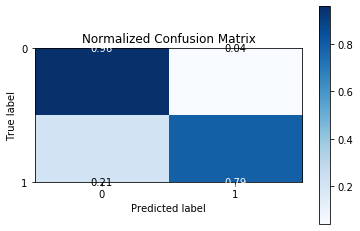

In [140]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=42, n_jobs=-1, solver='lbfgs')
logr.fit(X_train,Y_train)
y_pred = logr.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       549
           1       1.00      1.00      1.00       342

    accuracy                           1.00       891
   macro avg       1.00      1.00      1.00       891
weighted avg       1.00      1.00      1.00       891



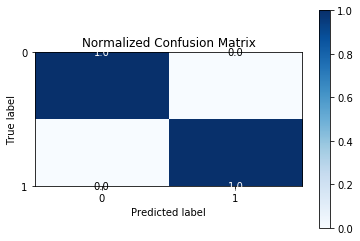

In [166]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train,Y_train)
y_pred = gnb.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       549
           1       0.87      0.74      0.80       342

    accuracy                           0.86       891
   macro avg       0.86      0.83      0.84       891
weighted avg       0.86      0.86      0.85       891



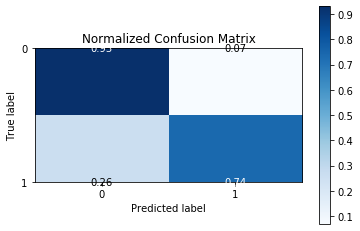

In [142]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(X_train,Y_train)
y_pred = bnb.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       549
           1       0.79      0.72      0.75       342

    accuracy                           0.82       891
   macro avg       0.81      0.80      0.80       891
weighted avg       0.82      0.82      0.82       891



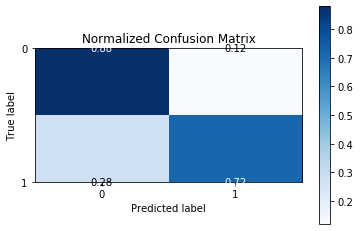

In [143]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit( X_train,Y_train)
y_pred = knn.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

              precision    recall  f1-score   support

           0       0.70      0.92      0.79       549
           1       0.73      0.36      0.48       342

    accuracy                           0.70       891
   macro avg       0.71      0.64      0.64       891
weighted avg       0.71      0.70      0.67       891



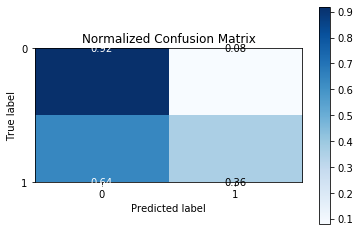

In [107]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train,Y_train)
y_pred = svc.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

              precision    recall  f1-score   support

           0       0.69      1.00      0.81       549
           1       0.99      0.27      0.43       342

    accuracy                           0.72       891
   macro avg       0.84      0.64      0.62       891
weighted avg       0.80      0.72      0.67       891



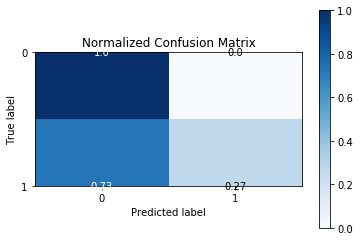

In [116]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=5, random_state=1)
rfc.fit(X_train,Y_train)
y_pred = rfc.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

Now, we tried 6 different models on our dataset namely Logistic Regression, GaussianNB, BernoulliNB, K-Nearest Neighbors, SVC and Random Forest. Only Logistic Regression and GaussianNB gives satisfying results. But we still cannot know whether these two models are overfitting. Now, we will try boosting algorithms.

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       549
           1       0.93      0.86      0.89       342

    accuracy                           0.92       891
   macro avg       0.92      0.91      0.92       891
weighted avg       0.92      0.92      0.92       891



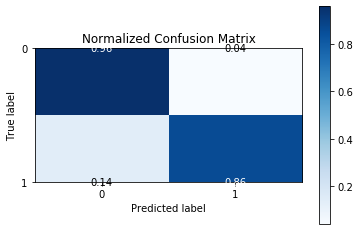

In [144]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=2200, random_state=1, max_depth=4, min_samples_leaf=15)
gbc.fit(X_train,Y_train)
y_pred = gbc.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       549
           1       0.94      0.89      0.91       342

    accuracy                           0.93       891
   macro avg       0.94      0.93      0.93       891
weighted avg       0.94      0.93      0.93       891



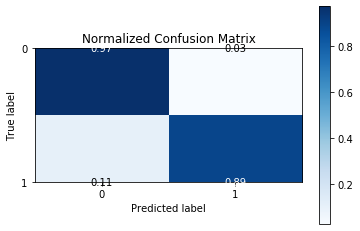

In [170]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=2000, gamma=0.05, subsample=0.5213, nthread=-1)
xgbc.fit(X_train,Y_train)
y_pred = xgbc.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

GradientBoosting and XGB doesn't differ very much with XGB having a slight increase in accuracy. I tried to remove 'Name' feature from the model because it has a lot of categories. But removing 'Name' feature results in decrease of accuracies in most of the models. So we will train our XGB without removing 'Name' Feature and see what we get.

In [171]:
y_test_pred = xgbc.predict(X_test)
output = pd.DataFrame({'PassengerId': test_Id, 'Survived': y_test_pred})
output.to_csv('my_submission_2.csv',index=False)

Got 0.74641 kaggle score with XGB. I will try to do some feature engineering further without changing the model.
Things to try:
1. Do feature engineering only on train data [No need]
2. Outlier removal (Tukey's method)
3. Skewness transformation
4. 'Name' feature handling (title extraction) [Done]
5. 'Age' binning after sorting [Doesn't Work] [Need to handle 'Age' by age-groups referring to other features]
6. 'ParFam' categorization (single,smallFam,medFam,largeFam) 
7. Do not get_dummies all the features! Only Indicator variables! [Done]
8. Cabin data handling [Done]
9. Ticket data handling [Done]
10. Cross Validating the models
11. Parameter tuning with GridSearchCV
12. Plotting learning curves
13. Model Stacking
14. Ensembling with voting

# 4. Feature Engineering (Improved)

In [80]:
df.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Ticket,ParFam
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",3,male,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,female,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",3,male,373450,0


## 4.1. Outlier Handling

In [32]:
from collections import Counter

In [33]:
def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers 

In [34]:
outliers_to_drop = detect_outliers(train,2,["Age","Fare","Parch","SibSp"])
train.loc[outliers_to_drop]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.00,C23 C25 C27,S
88,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.00,C23 C25 C27,S
159,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
341,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.00,C23 C25 C27,S
792,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [35]:
train = train.drop(outliers_to_drop, axis=0).reset_index(drop=True)

In [36]:
n_train = train.shape[0]
n_test = train.shape[0]
df = pd.concat((train,test), sort=True).reset_index(drop=True)
df = df.drop(['Survived'],axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Parch,Pclass,Sex,SibSp,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,3,male,1,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,1,female,1,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,female,0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,1,female,1,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,3,male,0,373450


In [37]:
df['ParFam'] = df['Parch']+df['SibSp']
df= df.drop(['Parch','SibSp'], axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Ticket,ParFam
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",3,male,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",3,female,STON/O2. 3101282,0
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",3,male,373450,0


## 4.2. Age

For 'Age', we will just go with my initial binning method. This method is not accurate as the missing 'Age' values don't have direct correlation with the 'Age' values in their neighbors. But, we will first just stick with this method and see the result.

In [38]:
import sys
import math
age_col = df["Age"]
bin = math.floor(len(age_col)/4)

for i in range(4):
    age_col[bin*i:bin*(i+1)] = age_col[bin*i:bin*(i+1)].fillna(age_col[bin*i:bin*(i+1)].mean())
age_col[bin*(i):] = age_col[bin*(i):].fillna(age_col[bin*(i):].mean())

print(np.sum(age_col.isnull()))
df["Age"] = age_col
print(np.sum(df["Age"].isnull()))

0
0


C:\Users\acer\Anaconda3\envs\Data_Science\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\acer\Anaconda3\envs\Data_Science\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## 4.3. Cabin

For 'Cabin' feature, we will replace the cabin numbers with initial letters, which represents the cabin class.

In [39]:
df['Cabin'] = pd.Series(i[0] if not pd.isnull(i) else 'X' for i in df['Cabin'])
print(np.sum(df['Cabin'].isnull()))

0


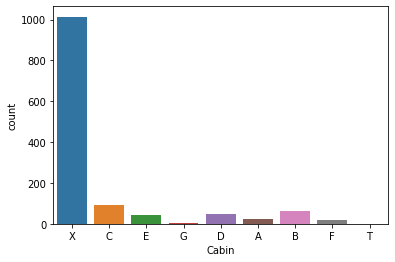

In [59]:
sns.countplot(df['Cabin'])

## 4.4. Name

For 'Name' feature, we will extract the title and replace the passengers' names with titles instead!

In [40]:
df['Title'] = [i.split(',')[1].split('.')[0].strip() for i in df['Name']]
df['Title'].tail()

1294        Mr
1295      Dona
1296        Mr
1297        Mr
1298    Master
Name: Title, dtype: object

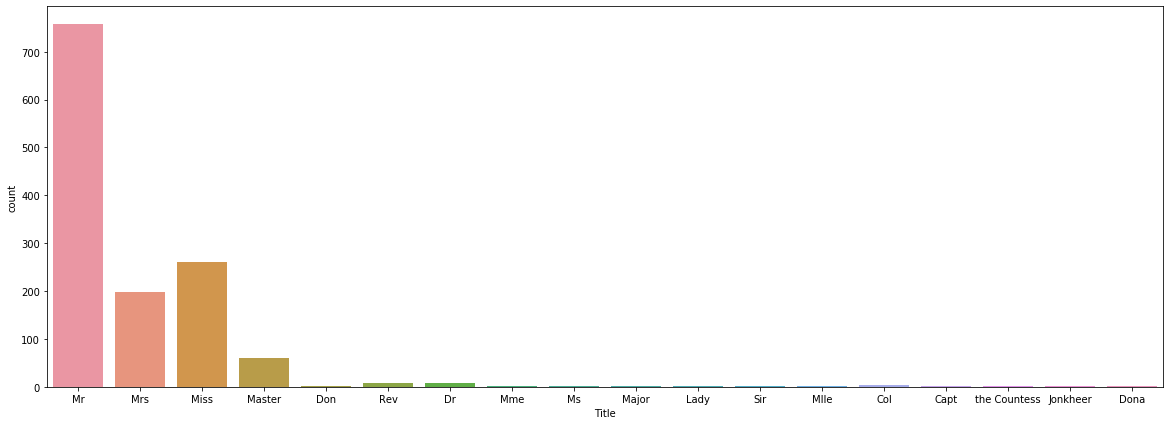

In [61]:
plt.figure(figsize=(20,7))
sns.countplot(df['Title'])

In [41]:
df['Title'] = df['Title'].replace(['Don','Rev','Dr','Major','Sir','Col','Capt','the Countess','Jonkheer','Dona'],'Rare')
df['Title'] = df['Title'].map({'Master':0, 'Miss':1, 'Mrs':1, 'Mme':1, 'Ms':1, 'Lady':1, 'Mlle':1, 'Mr':2, 'Rare':3 })
df['Title'] = df['Title'].astype(int)
df.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Ticket,ParFam,Title
0,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",3,male,A/5 21171,1,2
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,PC 17599,1,1
2,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",3,female,STON/O2. 3101282,0,1
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,113803,1,1
4,35.0,X,S,8.0500,"Allen, Mr. William Henry",3,male,373450,0,2


In [42]:
df = df.drop(['Name'], axis=1)
df.head()

,Age,Cabin,Embarked,Fare,Pclass,Sex,Ticket,ParFam,Title
0,22.0,X,S,7.2500,3,male,A/5 21171,1,2
1,38.0,C,C,71.2833,1,female,PC 17599,1,1
2,26.0,X,S,7.9250,3,female,STON/O2. 3101282,0,1
3,35.0,C,S,53.1000,1,female,113803,1,1
4,35.0,X,S,8.0500,3,male,373450,0,2


## 4.5. Ticket

In [86]:
df['Ticket'].head(30)

0            A/5 21171
1             PC 17599
2     STON/O2. 3101282
3               113803
4               373450
5               330877
6                17463
7               349909
8               347742
9               237736
10             PP 9549
11              113783
12           A/5. 2151
13              347082
14              350406
15              248706
16              382652
17              244373
18              345763
19                2649
20              239865
21              248698
22              330923
23              113788
24              349909
25              347077
26                2631
27               19950
28              330959
29              349216
Name: Ticket, dtype: object

In [43]:
df["Ticket"] = [i.replace("/","").replace(".","").split(" ")[0] if not i.isdigit() else "X" for i in df["Ticket"]]
df.head()

,Age,Cabin,Embarked,Fare,Pclass,Sex,Ticket,ParFam,Title
0,22.0,X,S,7.2500,3,male,A5,1,2
1,38.0,C,C,71.2833,1,female,PC,1,1
2,26.0,X,S,7.9250,3,female,STONO2,0,1
3,35.0,C,S,53.1000,1,female,X,1,1
4,35.0,X,S,8.0500,3,male,X,0,2


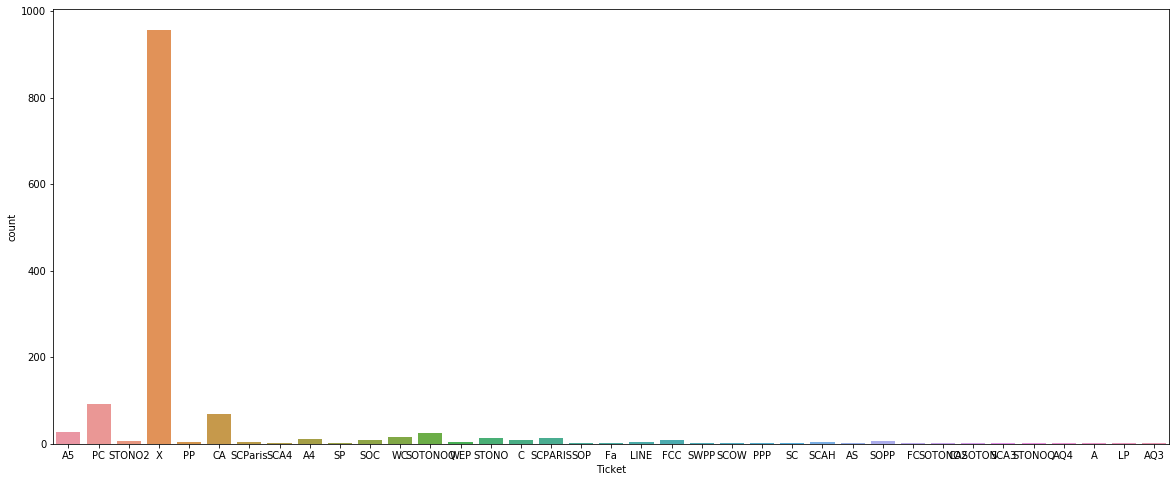

In [66]:
plt.figure(figsize=(20,8))
sns.countplot(df["Ticket"])

## 4.6. Embarked

In [44]:
df["Embarked"] = df["Embarked"].fillna('S')
print(np.sum(df["Embarked"].isnull()))

0


## 4.7. Fare

In [45]:
df["Fare"] = df["Fare"].fillna(df["Fare"].mean())
print(np.sum(df["Fare"].isnull()))

0


In [46]:
print(np.sum(df.isnull()))

Age         0
Cabin       0
Embarked    0
Fare        0
Pclass      0
Sex         0
Ticket      0
ParFam      0
Title       0
dtype: int64


In [47]:
df["Fare"] = [np.log(i) if i>0 else 0 for i in df["Fare"]]

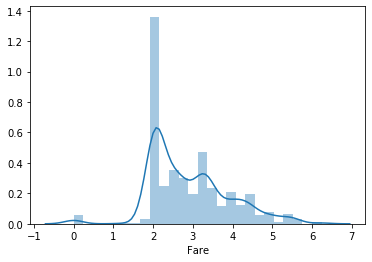

In [48]:
sns.distplot(df["Fare"])

## 4.8. Dummification

In [49]:
df = pd.get_dummies(df, columns=["Cabin"], prefix="C")
df.head()

,Age,Embarked,Fare,Pclass,Sex,Ticket,ParFam,Title,C_A,C_B,C_C,C_D,C_E,C_F,C_G,C_T,C_X
0,22.0,S,1.981001,3,male,A5,1,2,0,0,0,0,0,0,0,0,1
1,38.0,C,4.266662,1,female,PC,1,1,0,0,1,0,0,0,0,0,0
2,26.0,S,2.070022,3,female,STONO2,0,1,0,0,0,0,0,0,0,0,1
3,35.0,S,3.972177,1,female,X,1,1,0,0,1,0,0,0,0,0,0
4,35.0,S,2.085672,3,male,X,0,2,0,0,0,0,0,0,0,0,1


In [50]:
df = pd.get_dummies(df, columns=["Embarked"], prefix="Em")
df.head()

,Age,Fare,Pclass,Sex,Ticket,ParFam,Title,C_A,C_B,C_C,C_D,C_E,C_F,C_G,C_T,C_X,Em_C,Em_Q,Em_S
0,22.0,1.981001,3,male,A5,1,2,0,0,0,0,0,0,0,0,1,0,0,1
1,38.0,4.266662,1,female,PC,1,1,0,0,1,0,0,0,0,0,0,1,0,0
2,26.0,2.070022,3,female,STONO2,0,1,0,0,0,0,0,0,0,0,1,0,0,1
3,35.0,3.972177,1,female,X,1,1,0,0,1,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,3,male,X,0,2,0,0,0,0,0,0,0,0,1,0,0,1


In [51]:
df["Pclass"] = df["Pclass"].astype("category")
df= pd.get_dummies(df, columns=["Pclass"], prefix="Pc")
df.head()

,Age,Fare,Sex,Ticket,ParFam,Title,C_A,C_B,C_C,C_D,...,C_F,C_G,C_T,C_X,Em_C,Em_Q,Em_S,Pc_1,Pc_2,Pc_3
0,22.0,1.981001,male,A5,1,2,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
1,38.0,4.266662,female,PC,1,1,0,0,1,0,...,0,0,0,0,1,0,0,1,0,0
2,26.0,2.070022,female,STONO2,0,1,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1
3,35.0,3.972177,female,X,1,1,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
4,35.0,2.085672,male,X,0,2,0,0,0,0,...,0,0,0,1,0,0,1,0,0,1


In [52]:
df = pd.get_dummies(df, columns=["Sex"], prefix="S")
df.head()

,Age,Fare,Ticket,ParFam,Title,C_A,C_B,C_C,C_D,C_E,...,C_T,C_X,Em_C,Em_Q,Em_S,Pc_1,Pc_2,Pc_3,S_female,S_male
0,22.0,1.981001,A5,1,2,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1
1,38.0,4.266662,PC,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,1,0
2,26.0,2.070022,STONO2,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,1,1,0
3,35.0,3.972177,X,1,1,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
4,35.0,2.085672,X,0,2,0,0,0,0,0,...,0,1,0,0,1,0,0,1,0,1


In [53]:
df = pd.get_dummies(df, columns=["Title"], prefix="T")
df.head()

,Age,Fare,Ticket,ParFam,C_A,C_B,C_C,C_D,C_E,C_F,...,Em_S,Pc_1,Pc_2,Pc_3,S_female,S_male,T_0,T_1,T_2,T_3
0,22.0,1.981001,A5,1,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0
1,38.0,4.266662,PC,1,0,0,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0
2,26.0,2.070022,STONO2,0,0,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,0
3,35.0,3.972177,X,1,0,0,1,0,0,0,...,1,1,0,0,1,0,0,1,0,0
4,35.0,2.085672,X,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0


In [54]:
df = pd.get_dummies(df, columns=["Ticket"], prefix="Tic")
df.head()

,Age,Fare,ParFam,C_A,C_B,C_C,C_D,C_E,C_F,C_G,...,Tic_SOTONO2,Tic_SOTONOQ,Tic_SP,Tic_STONO,Tic_STONO2,Tic_STONOQ,Tic_SWPP,Tic_WC,Tic_WEP,Tic_X
0,22.0,1.981001,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,38.0,4.266662,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,26.0,2.070022,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,35.0,3.972177,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,2.085672,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 5. Model Training (with Modified Dataset)

In [55]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report
import scikitplot as skplt

In [56]:
X_train = df[:n_train]
X_test = df[n_train:]
Y_train = train['Survived']
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)

(881, 61)
(418, 61)
(881,)


## 5.1. KNN

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       541
           1       0.86      0.79      0.82       340

    accuracy                           0.87       881
   macro avg       0.86      0.85      0.86       881
weighted avg       0.87      0.87      0.86       881



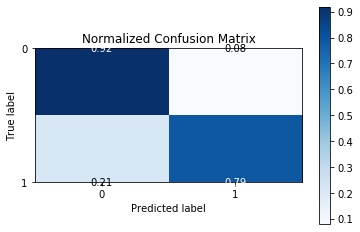

In [57]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit( X_train,Y_train)
y_pred = knn.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

## 5.2. Logistic Regression

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       541
           1       0.81      0.76      0.78       340

    accuracy                           0.84       881
   macro avg       0.83      0.82      0.83       881
weighted avg       0.84      0.84      0.84       881



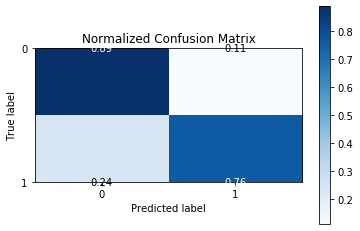

In [58]:
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=42, n_jobs=-1, solver='lbfgs')
logr.fit(X_train,Y_train)
y_pred = logr.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)


## 5.3. XGBoost

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       541
           1       0.94      0.91      0.93       340

    accuracy                           0.94       881
   macro avg       0.94      0.94      0.94       881
weighted avg       0.94      0.94      0.94       881



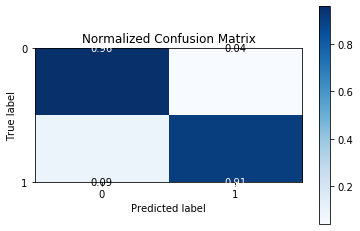

In [59]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=2000, gamma=0.05, subsample=0.5213, nthread=-1)
xgbc.fit(X_train,Y_train)
y_pred = xgbc.predict(X_train)

print(classification_report(Y_train,y_pred))
skplt.metrics.plot_confusion_matrix(Y_train,y_pred, normalize=True)

After thorough inspection on dataset and detailed feature engineering, we can see the training accuracy improvement in XGBoost Algorithm. 

In [60]:
test_result = xgbc.predict(X_test)
output = pd.DataFrame({'PassengerId': test_Id, 'Survived': test_result})
output.to_csv('my_submission_3.csv',index=False)